In [1]:
import jieba
import jieba.analyse
import requests
import pymysql
import csv
import pandas as pd
import numpy as np


# Open database connection
conn = pymysql.connect(host='192.168.35.168'
                       ,port=3306
                       ,user='amber'
                       ,passwd='amber'
                       ,db='news')
# prepare a cursor object using cursor() method
cursor = conn.cursor()
sql = "SELECT * FROM news_test_per2000"
output_csv_file = 'C:/Users/Student/Desktop/news/text.csv'
userdict_txt = "C:/Users/Student/Desktop/news/userdict0602.txt"
cursor.execute(sql)
results = cursor.fetchall

In [ ]:
print(results)

In [ ]:
np.array(results)

In [2]:
df = pd.read_sql(sql, con=conn)

In [ ]:
df

In [3]:
df['type_final'].value_counts()

運動    2000
經濟    2000
政治    2000
生活    2000
國際    2000
娛樂    2000
社會    2000
Name: type_final, dtype: int64

In [4]:
catagories = df.groupby('type_final').size().index.tolist()
catagory_dict = {}
int_catagory = {}
for i, k in enumerate(catagories):
    catagory_dict.update({k:i})
    int_catagory.update({i:k})

In [5]:
df['c2id'] = df['type_final'].apply(lambda x: catagory_dict[x])

In [ ]:
# df['tags_final']= df['tags_final'].str.split("、") 
# print(df['tags_final'])

In [6]:
data1=df[["tags_final","c2id"]]

In [8]:
tags= df['tags_final'].str.replace("、"," ")
train_data=[]
for i in tags:
    train_data.append(i)
# print(train_data)    



In [9]:
train_target=[]
for i in df['c2id']:
    train_target.append(i)
# print(train_target)     

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(train_data,train_target,test_size=0.2, shuffle=True)
# print(x_train)
# print("-----"*100)
# print(y_train)
# print(x_test)
# print(y_test)

In [ ]:
type(y_test)

In [ ]:
# train_data1=[]
# for i in range(len(train_data)):
#     for j in range(len(train_data[i])):
#         train_data1.append(train_data[i][j])
        

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer   
vectorizer= CountVectorizer();  
counts_all = vectorizer.fit_transform(train_data);
count_v1= CountVectorizer(vocabulary=vectorizer.vocabulary_);  
counts_train = count_v1.fit_transform(x_train);   
print ("the shape of train is "+repr(counts_train.shape))  
count_v2 = CountVectorizer(vocabulary=vectorizer.vocabulary_);  
counts_test = count_v2.fit_transform(x_test);  
print ("the shape of test is "+repr(counts_test.shape))  
  
tfidftransformer = TfidfTransformer();    
x_train = tfidftransformer.fit(counts_train).transform(counts_train);
x_test = tfidftransformer.fit(counts_test).transform(counts_test);

the shape of train is (11200, 81066)
the shape of test is (2800, 81066)


In [ ]:
# print(vectorizer.get_feature_names())  
# print(vectorizer.vocabulary_)
# print(counts_all.toarray())

### navie bays

In [16]:
from sklearn.naive_bayes import MultinomialNB  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


clf = MultinomialNB(alpha = 0.01)   
clf.fit(x_train, y_train);  
y_pred = clf.predict(x_test);
num = 0
preds = y_pred.tolist()
# print(preds)
for i,pred in enumerate(preds):
    if int(pred) == int(y_test[i]):
        num += 1
    else :
        continue
print('precision_score:' + str(float(num) / len(preds)))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

precision_score:0.8110714285714286
0.8110714285714286
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       375
           1       0.86      0.89      0.87       419
           2       0.84      0.85      0.85       398
           3       0.64      0.66      0.65       389
           4       0.74      0.85      0.79       408
           5       0.85      0.77      0.81       401
           6       0.96      0.96      0.96       410

   micro avg       0.81      0.81      0.81      2800
   macro avg       0.81      0.81      0.81      2800
weighted avg       0.81      0.81      0.81      2800



In [17]:
mat=confusion_matrix(y_test, y_pred)
mat

array([[255,  16,  14,  32,  38,  12,   8],
       [  9, 371,   7,  18,  11,   1,   2],
       [ 15,   2, 340,  17,  17,   5,   2],
       [ 13,  23,  15, 258,  45,  32,   3],
       [  7,   5,  15,  28, 346,   6,   1],
       [ 16,   3,  15,  47,  12, 308,   0],
       [  3,  11,   0,   2,   1,   0, 393]], dtype=int64)

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

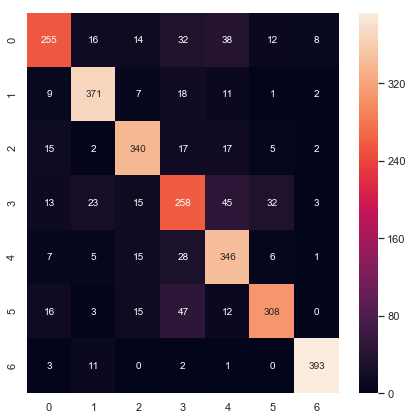

In [30]:
df_cm = pd.DataFrame(mat, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (7,7))
sns.heatmap(mat, annot=True,fmt="d") #cmap="YlGnBu",linewidths=.5

### knn 
n_neighbors=x 鄰近點個數
weights="uniform一致權重，distance 距離倒數"

In [13]:
from sklearn.neighbors import KNeighborsClassifier  

for x in range(1,10): 
    knnclf = KNeighborsClassifier(n_neighbors=x,weights="uniform")
    knnclf.fit(x_train,y_train)  
    preds = knnclf.predict(x_test);
    num = 0
    preds = preds.tolist()
    for i,pred in enumerate(preds):
        if int(pred) == int(y_test[i]):
            num += 1
    print ('K= '+str(x)+', precision_score:' + str(float(num) / len(preds)))
    

K= 1, precision_score:0.7203571428571428
K= 2, precision_score:0.7057142857142857
K= 3, precision_score:0.7539285714285714
K= 4, precision_score:0.7657142857142857
K= 5, precision_score:0.7771428571428571
K= 6, precision_score:0.7792857142857142
K= 7, precision_score:0.7914285714285715
K= 8, precision_score:0.795
K= 9, precision_score:0.7971428571428572


In [14]:
from sklearn.neighbors import KNeighborsClassifier  

for x in range(1,10): 
    knnclf = KNeighborsClassifier(n_neighbors=x,weights="distance")
    knnclf.fit(x_train,y_train)  
    preds = knnclf.predict(x_test);
    num = 0
    preds = preds.tolist()
    for i,pred in enumerate(preds):
        if int(pred) == int(y_test[i]):
            num += 1
    print ('K= '+str(x)+', precision_score:' + str(float(num) / len(preds)))

K= 1, precision_score:0.7203571428571428
K= 2, precision_score:0.7203571428571428
K= 3, precision_score:0.7625
K= 4, precision_score:0.7692857142857142
K= 5, precision_score:0.7803571428571429
K= 6, precision_score:0.7878571428571428
K= 7, precision_score:0.7928571428571428
K= 8, precision_score:0.7957142857142857
K= 9, precision_score:0.7996428571428571


### SVM
sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,

tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)

c 懲罰項 kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’

In [42]:
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
svclf = SVC(kernel = 'linear',C=1) 
svclf.fit(x_train,y_train)  
y_pred = svclf.predict(x_test);  
num = 0
preds = y_pred.tolist()
for i,pred in enumerate(preds):
    if int(pred) == int(y_test[i]):
        num += 1
print('precision_score:' + str(float(num) / len(preds)))
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

precision_score:0.825
0.825
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       375
           1       0.91      0.87      0.89       419
           2       0.88      0.84      0.86       398
           3       0.60      0.80      0.69       389
           4       0.82      0.79      0.81       408
           5       0.88      0.75      0.81       401
           6       0.97      0.94      0.96       410

   micro avg       0.82      0.82      0.82      2800
   macro avg       0.84      0.82      0.83      2800
weighted avg       0.84      0.82      0.83      2800



In [34]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[285,  11,  11,  31,  19,  12,   6],
       [ 11, 366,   7,  24,   8,   1,   2],
       [ 17,   1, 333,  26,  14,   5,   2],
       [ 11,  12,   5, 313,  23,  23,   2],
       [  9,   4,  14,  55, 324,   1,   1],
       [ 26,   2,   9,  57,   5, 302,   0],
       [  4,   6,   0,  13,   0,   0, 387]], dtype=int64)

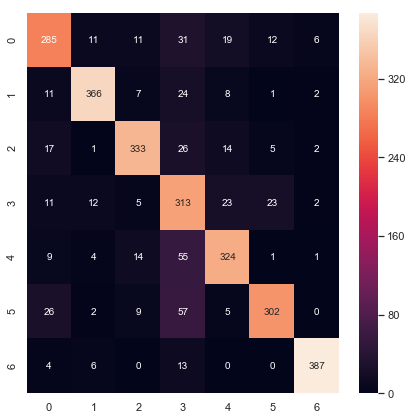

In [35]:
df_cm = pd.DataFrame(mat, index = [i for i in clf.classes_],
                  columns = [i for i in clf.classes_])
plt.figure(figsize = (7,7))
sns.heatmap(mat, annot=True,fmt="d") #cmap="YlGnBu",linewidths=.5

In [ ]:
#TEST
# corpus = [
#       "民政局長 中國醫藥大學附設醫院 胡志強 住進 加護病房 感冒症狀 住院",
#       "解決問題 台東 總統蔡英文 台灣 綠島 人一時 不滿意度 台東縣 民調", 
#       "韓國瑜 民進黨 電視政見 沐猴而冠 尊敬 段宜康 帽子 黨主席選舉",
#       "幾歲 測謊 救火隊 幕僚 上節目 何瑞英 市議員 落淚 市長 選舉" 
       
#  ]
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names())
# print(X.toarray()) 
